In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv("tmdb-movies.csv")
df.head()
df.columns


Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [ ]:
# 0. Найдите вашего любимого актера, режиссера, фильм и жанр.
# Том Кукуруз - Tom Cruise, Кристофер Нолан - Christopher Nolan,
# Парк Юрского Периода - Jurrasic Park, комедии - Comedy
# В вопросах у которых стоит значок ❤︎ нужно дополнительно использовать вашего любимого актера, фильм и т.п.

In [ ]:
# ❤︎ Фильм - Requiem for a Dream
# ❤︎ Актер - Ryan Gosling
# ❤︎ Режиссер - Steven Spielberg
# ❤︎ Жанр - Comedy

In [79]:
fav_film = 'Requiem for a Dream'
fav_actor = 'Ryan Gosling'
fav_director = 'Steven Spielberg'
fav_genre = 'Comedy'

In [ ]:
# 1. Какой фильм имеет больше всего оценок? (❤︎)

In [26]:
df[df['vote_count'] == df['vote_count'].max()][['original_title', 'vote_count']]

,original_title,vote_count
1919,Inception,9767


In [25]:
df[df['original_title'] == fav_film][['vote_count', 'original_title']]

,vote_count,original_title
8689,1316,Requiem for a Dream


In [ ]:
# 2. Какой фильм, а также какого жанра и года выпуска, имеет самые высокие оценки? (❤︎)

In [30]:
df[df['vote_average'] == df['vote_average'].max()][['original_title', 'genres', 'release_year']]

,original_title,genres,release_year
3894,The Story of Film: An Odyssey,Documentary,2011


In [ ]:
# 3. Какой фильм самый короткий/длинный по продолжительности? (❤︎)

In [34]:
df[df['runtime'] == df['runtime'].max()][['original_title', 'runtime']]

,original_title,runtime
3894,The Story of Film: An Odyssey,900


In [35]:
df[df['runtime'] == df['runtime'].min()][['original_title', 'runtime']]

,original_title,runtime
92,Mythica: The Necromancer,0
334,Ronaldo,0
410,Anarchy Parlor,0
445,The Exorcism of Molly Hartley,0
486,If There Be Thorns,0
595,Deep Dark,0
616,The Outfield,0
1241,Dance-Off,0
1289,Treehouse,0
1293,Tim Maia,0


In [ ]:
# 4. Сколько всего киностудий (product_companies)?

In [61]:
companies = df['production_companies'].str.split('|', expand=True).dropna().to_numpy().ravel()
companies.shape

(5630,)

In [ ]:
# 5. Какое количество фильмов сняла каждая из киностудий?

In [52]:
pd.Series(companies).value_counts()

Warner Bros.                              97
Universal Pictures                        68
Canal+                                    66
Twentieth Century Fox Film Corporation    59
Paramount Pictures                        56
                                          ..
Original Voices Inc.                       1
Social Capital                             1
Apotheosis Media Group                     1
Bausan Films                               1
Boy of the Year                            1
Length: 2518, dtype: int64

In [ ]:
# 6. Сколько фильмов было снято одной киностудией, двумя, тремя и т.д.?

In [65]:
df['production_companies'].str.split('|', expand=True).count(axis=1).value_counts()

1    3440
2    2580
3    1763
5    1126
0    1030
4     927
dtype: int64

In [ ]:
# 7. Какая средняя оценка у фильмов с вашим любимым актером?

In [85]:
df[df['cast'].astype(str).str.contains(fav_actor)]['vote_average'].mean()

6.605882352941176

In [89]:
# 7.1. Найдите актера, который снимался чаще всего и ответьте на вопрос в каких жанрах? (❤︎)

In [129]:
actors = df['cast'].str.split('|', expand=True).dropna().to_numpy().ravel()
popular_actor = pd.Series(actors).mode()[0]
print(popular_actor)
index = np.nonzero(np.isin(data['cast'].str.split('|', expand=True).to_numpy(), popular_actor))[0]
data.iloc[index]['genres']

Robert De Niro


51                               Comedy
53                         Comedy|Drama
109               Crime|Action|Thriller
494                               Drama
572                              Comedy
                      ...              
10268        Comedy|Crime|Romance|Drama
10272                             Drama
10507    Adventure|Drama|Action|History
10596                       Drama|Crime
10762                         Drama|War
Name: genres, Length: 72, dtype: object

In [ ]:
# 8. Сборы какой кинокомпании самые высокие за последние 5 лет (с 2010 по 2015)?

In [ ]:
gap = df[(df['release_year'] >= '2010') & (df['release_year'] <= '2015')]]

In [ ]:
# 9. Топ-10 режиссеров и актеров с самым высоким в среднем рейтингом фильмов?

In [48]:
directors = df['director'].str.split("|", expand=True).dropna().to_numpy().ravel()

In [100]:
# 10. Фильмы в каком жанре в среднем имеют самые высокие оценки? (❤︎)

In [104]:
genre = df['genres'].str.split("|", expand=True).dropna().to_numpy().ravel()


In [105]:
df[df['genres'].astype(str).str.contains(fav_genre)]['vote_average'].mean()

5.90516741365673

In [ ]:
# 11. Топ-10 ключевых слов (keywords)?

In [126]:
keywords = df['keywords'].str.split("|", expand=True).dropna().to_numpy().ravel()
pd.Series(keywords).value_counts().head(10)

sex                 258
based on novel      243
independent film    175
murder              157
nudity              150
female nudity       142
new york            132
prison              111
london              107
sport               103
dtype: int64

In [ ]:
# 12. Растет ли бюджет фильмов с каждым годом? (постройте график)

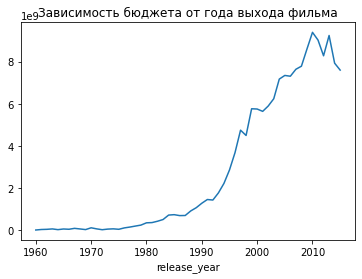

In [69]:
df.groupby('release_year')['budget'].sum().plot(title='Зависимость бюджета от года выхода фильма')

In [ ]:
# 13. Что больше всего влияет на доходы фильмов?

In [ ]:
# 14. Топ-5 самых прибильных и убыточных фильмов (по соотношению бюджета к доходам)

In [ ]:
# 15. Как изменялось количество снимаемых фильмов в жанре "Drama" с течением времени? (Постройте график) ❤︎

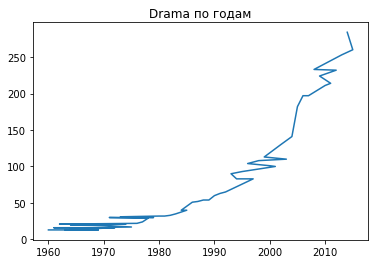

In [123]:
df[df['genres'].astype(str).str.contains('Drama')]['release_year'].value_counts().plot(title = 'Drama по годам')


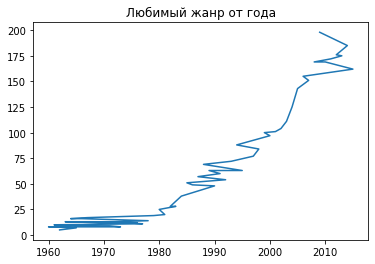

In [122]:
df[df['genres'].astype(str).str.contains(fav_genre)]['release_year'].value_counts().plot(title = 'Любимый жанр от года')

In [ ]:
# 16. Топ-10 актеров, которые снялись в наибольшем количестве фильмов.

In [125]:
pd.Series(actors).value_counts().head(10)

Robert De Niro       70
Samuel L. Jackson    67
Bruce Willis         61
Nicolas Cage         61
Michael Caine        52
Robin Williams       50
John Cusack          49
John Goodman         48
Susan Sarandon       48
Morgan Freeman       48
dtype: int64

In [ ]:
# 17. Средний рейтинг фильмов по годам (постройте график)

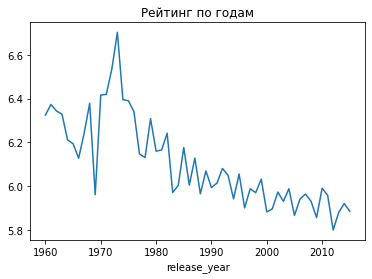

In [84]:
df.groupby('release_year')['vote_average'].mean().plot(title='Рейтинг по годам')

In [ ]:
# 18. Постройте график распределения жанров (столько-то процентов это боевики, столько-то комедии и т.п.)

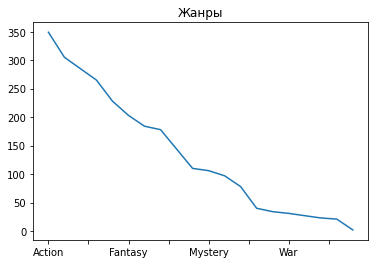

In [134]:
genres = df['genres'].str.split("|", expand=True).dropna().to_numpy().ravel()
pd.Series(genres).value_counts().plot(title = 'Жанры')

In [ ]:
# 19. Какой режиссер чаще всего снимал одного и того же актера?

In [ ]:
# 20. Какая пара жанров чаще всего встречается вместе?

In [ ]:
# 21. Топ-10 ключевых слов с самым высоким рейтингом/бюджетом/доходами фильмов (слово - срейдний рейтинг/бюджет/доходы)

In [ ]:
# 22. Постройте и визуализируйте граф связей между актерами (как это было в работе АПИ ВК).